The data set given for the project is from " https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees " 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

Suppose the manager is interested in the following questions 

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [4]:
# Fetch the data of garment employees/workers

df_g_emps = pd.read_csv("garments_worker_productivity.csv")
df_g_emps.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

In [5]:
#1 Basic Summary statistics of the data for the numerical variables
df_g_emps.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
#2 basic Summary of the data for the number of working days, count of quarters in the year
print('Summary of the data for the number of working days: ', df_g_emps.date.nunique(), 'Days')
print('Summary of the data for the count of quarters in the year: ', df_g_emps.quarter.nunique(), 'Quarters')

Summary of the data for the number of working days:  59 Days
Summary of the data for the count of quarters in the year:  5 Quarters


In [7]:
#3 Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every 
# quarter and conclusion accordingly

df_g_emps.groupby(by='quarter')['actual_productivity'].agg(['mean','std'])


,mean,std
quarter,,
Quarter1,0.751560,0.161318
Quarter2,0.743710,0.171114
Quarter3,0.704759,0.175614
Quarter4,0.709067,0.185983
Quarter5,0.826177,0.183851


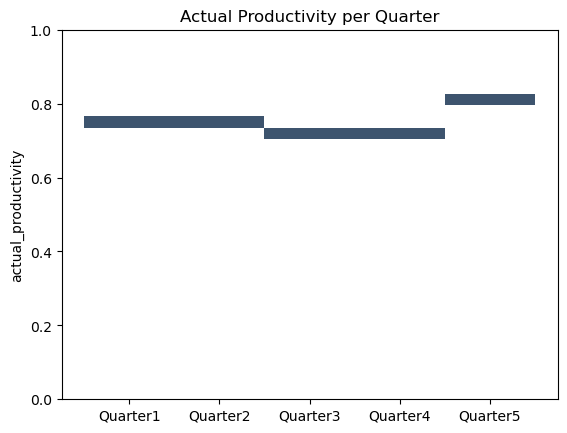

In [8]:
sns.histplot(x=df_g_emps.quarter.unique(), y=df_g_emps.groupby(by='quarter')['actual_productivity'].mean())
plt.ylim(0,1)
plt.title('Actual Productivity per Quarter')
plt.show()

Conclusion: In summary, we find that productivity levels are approximately 75% in Quarter 1 and Quarter 2, with a standard deviation of 0.16, while productivity dips slightly to around 70% in Quarter 3 and Quarter 4, with a standard deviation of 0.17.

It appears that workers tend to be more productive during the first two quarters, possibly due to the motivating factor of their salary incentives.

Note: Quarter 5 is excluded from analysis as it only spans three days and could skew the data.

In [ ]:
#4 Number count for sewing and finishing department

In [9]:
print('The count of records per department are: ')
df_g_emps.groupby('department')['department'].count()

The count of records per department are: 


department
finishing    506
sewing       691
Name: department, dtype: int64

In [62]:
#5 Mean and standard deviation of actual producivity for sewing and 
# finishing Histogram plot of actual productivity based on both department and conclusion accordingly
print('The Mean and Std Dev of actual productivity for each dept:')
df_g_emps.groupby(by='department')['actual_productivity'].agg(['mean', 'std'])

The Mean and Std Dev of actual productivity for each dept:


,mean,std
department,,
finishing,0.752951,0.197021
sewing,0.722013,0.154784


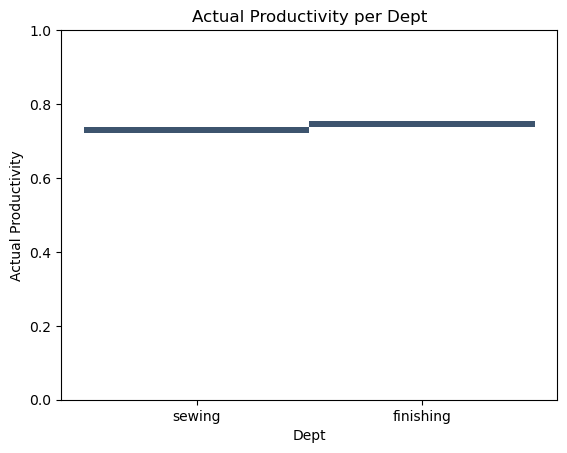

In [12]:
sns.histplot(x=df_g_emps.department.unique(),
             y=[df_g_emps[df_g_emps['department'] == 'sewing']['actual_productivity'].mean(),
                df_g_emps[df_g_emps['department'] == 'finishing']['actual_productivity'].mean()])
plt.ylim(0,1)
plt.title('Actual Productivity per Dept')
plt.ylabel('Actual Productivity')
plt.xlabel('Dept')
plt.show()

In [63]:
expected_percents = [0.30, 0.30, 0.40]
expected_values = np.array(expected_percents) * df_g_emps[df_g_emps['department'] == 'sewing']['productivity'].count()
expected_values

array([207.3, 207.3, 276.4])

In [64]:
chisquare(f_obs=observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=315.2952243125905, pvalue=3.4238281264112183e-69)

Conclusion:
    In conclusion, the actual productivity in the finishing department is estimated to be around 75%, with a standard deviation of 0.19, while in the sewing department it's approximately 72%, with a standard deviation of 0.15.

Based on these point estimates, it appears that the finishing department is more productive than the sewing department.

In [14]:
#6 Number count for teams, smv across the year
print('No. of teams across the data: ', df_g_emps.team.nunique())
print('No. of SMVs across the data: ', df_g_emps.smv.nunique())

No. of teams across the data:  12
No. of SMVs across the data:  70


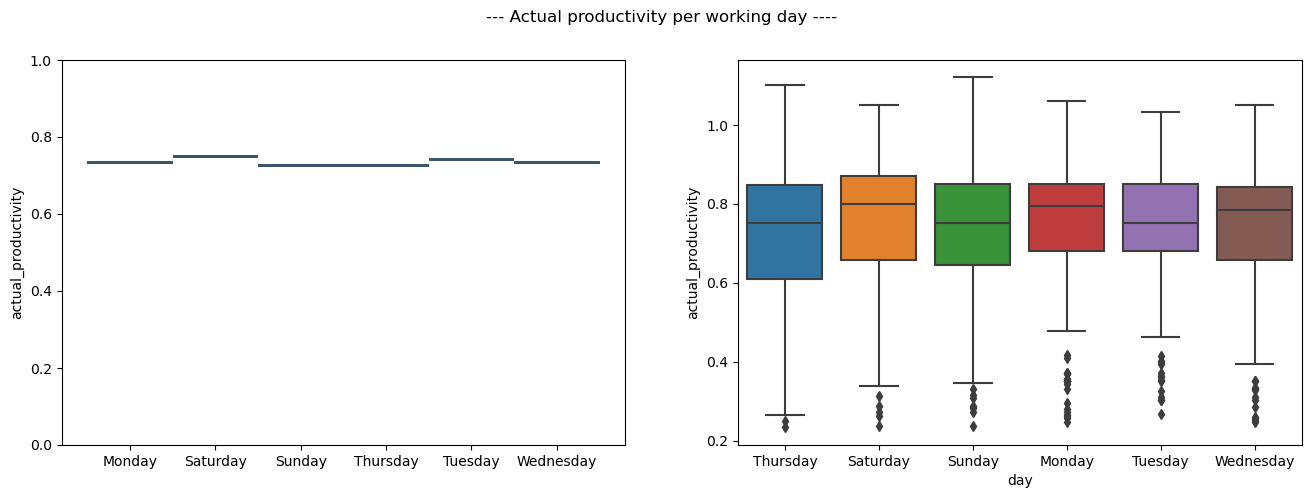

In [16]:
#7 Histogram & Box plot of actual productivity based on all working days, 
# team size, quarterts and Conclude accordingly
# 1. working Days
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=sorted(df_g_emps.day.unique()), y=df_g_emps.groupby(by='day')['actual_productivity'].mean())
plt.ylim(0,1)
plt.subplot(1,2,2)
sns.boxplot(x=df_g_emps.day, y=df_g_emps.actual_productivity)
plt.suptitle('--- Actual productivity per working day ----')
plt.show()

Conclusion: 

In conclusion, it is evident that productivity is highest on Saturdays compared to other days. This trend may be attributed to the fact that Saturday marks the first working day of the week following the weekly off on Fridays.

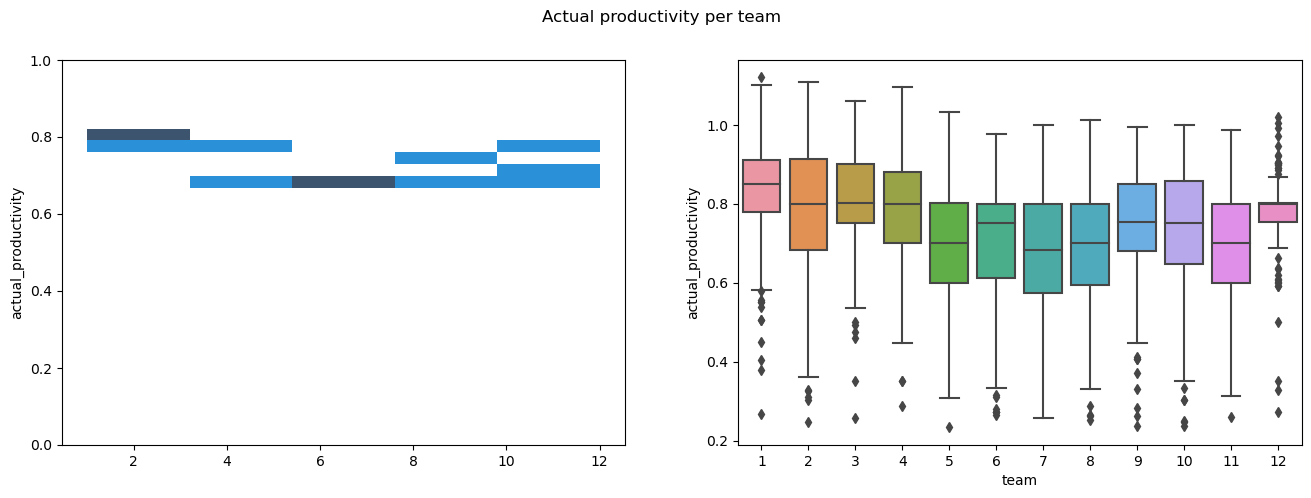

In [17]:
# Team wise
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=sorted(df_g_emps.team.unique()), y=df_g_emps.groupby(by='team')['actual_productivity'].mean())
plt.ylim(0,1)
plt.subplot(1,2,2)
sns.boxplot(x=df_g_emps.team, y=df_g_emps.actual_productivity)
plt.suptitle('Actual productivity per team')
plt.show()

Conclusion:

In conclusion, Team 7 stands out as the most consistent team without any outliers. Despite having lower productivity compared to other teams, their data shows an almost symmetric interquartile range (IQR).

Team 12, on the other hand, exhibits the highest number of outliers on both ends, indicating a skewed performance.

Finally, Team 2 emerges as the top-performing team, boasting high productivity, a symmetric IQR, and only a few outliers on the lower end (Q1), with none on the upper end (Q4).

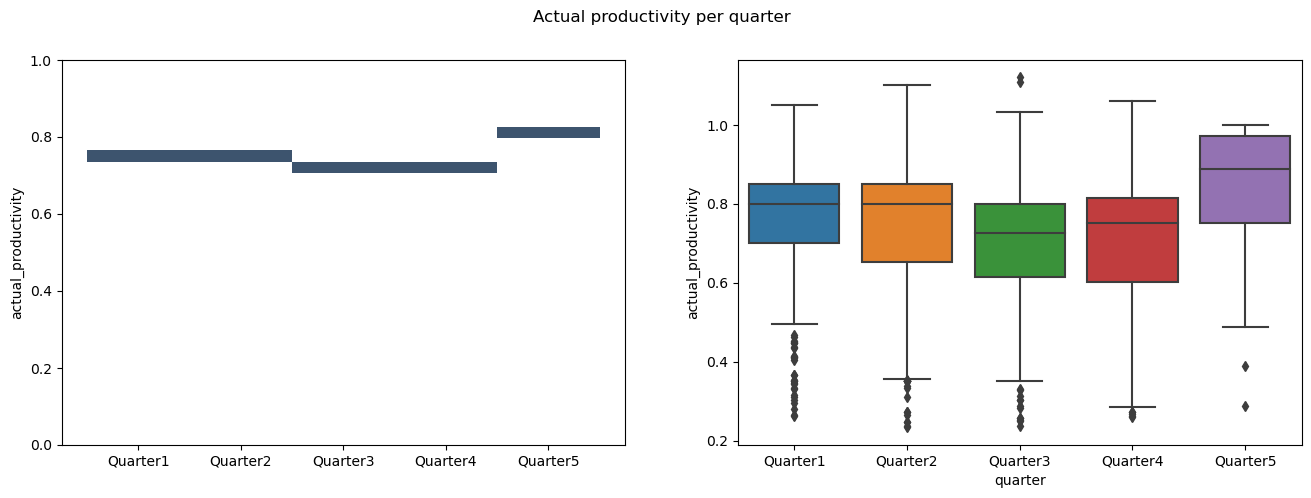

In [20]:
# Quarter wise
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=sorted(df_g_emps.quarter.unique()), y=df_g_emps.groupby(by='quarter')['actual_productivity'].mean())
plt.ylim(0,1)
plt.subplot(1,2,2)
sns.boxplot(x=df_g_emps.quarter, y=df_g_emps.actual_productivity)
plt.suptitle('Actual productivity per quarter')
plt.show()

In conclusion, the observed productivity levels are approximately 75% for Quarter 1 and Quarter 2, and around 70% for Quarter 3 and Quarter 4. It appears that workers tend to be more productive during the first two quarters, possibly due to the motivating factor of their rewarding salary.

Note: Quarter 5 is excluded from analysis as it spans only three days and could potentially skew the data.

In [61]:
#8 Find correlation matrix and draw heat map for all variables

heat = df_g_emps.corr(numeric_only=True)
heat



,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


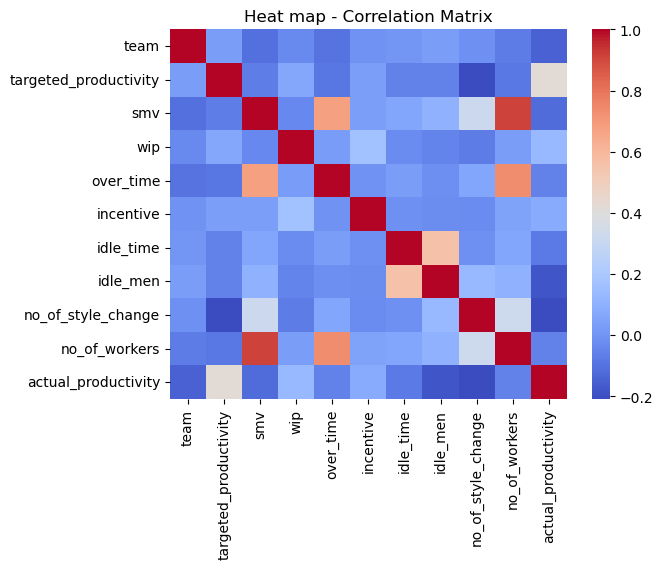

In [22]:
#sns.heatmap(heat, cmap='YlGnBu')
sns.heatmap(heat, cmap='coolwarm')
plt.title('Heat map - Correlation Matrix')
plt.show()

In [ ]:
#9 Conclude (Is the company able to meet target, are they giving incentives based on producitivity, 
# does overtime have any effect on productivity)


In summary, the correlation statistic and heat map reveal several insights:

The company generally meets targeted productivity, indicated by a positive correlation value.
There is a weak correlation between incentive-based pay and productivity, suggesting that the company's incentive system may not significantly impact production levels despite the positive correlation.
Overtime hours do not seem to have a significant effect on worker productivity, as indicated by a correlation that tends towards 0.

In [26]:
#10 Find the correlation between actual and target productivity for every quarter 
# and for every department. What do you conclude
# Quarter wise data

q1 = df_g_emps[df_g_emps['quarter'] == 'Quarter1']
q2 = df_g_emps[df_g_emps['quarter'] == 'Quarter2']
q3 = df_g_emps[df_g_emps['quarter'] == 'Quarter3']
q4 = df_g_emps[df_g_emps['quarter'] == 'Quarter4']

# Department wise data
sew = df_g_emps[df_g_emps['department'] == 'sewing']
fin = df_g_emps[df_g_emps['department'] == 'finishing']

print('\nThe correlation between Target and Actual productivity in Q1:', q1.targeted_productivity.corr(q1.actual_productivity))
print('\nThe correlation between Target and Actual productivity in Q2:', q2.targeted_productivity.corr(q2.actual_productivity))
print('\nThe correlation between Target and Actual productivity in Q3:', q3.targeted_productivity.corr(q3.actual_productivity))
print('\nThe correlation between Target and Actual productivity in Q4:', q4.targeted_productivity.corr(q4.actual_productivity))
print('\nThe correlation between Target and Actual productivity in Sewing Dept:', sew.targeted_productivity.corr(sew.actual_productivity))
print('\nThe correlation between Target and Actual productivity in Finishing Dept:', fin.targeted_productivity.corr(fin.actual_productivity))


The correlation between Target and Actual productivity in Q1: 0.49277933867351814

The correlation between Target and Actual productivity in Q2: 0.42716393082180437

The correlation between Target and Actual productivity in Q3: 0.39263722595670103

The correlation between Target and Actual productivity in Q4: 0.34759413955931234

The correlation between Target and Actual productivity in Sewing Dept: 0.6979697346204635

The correlation between Target and Actual productivity in Finishing Dept: 0.09751042868300777



In conclusion, the correlation statistic highlights the following observations:

Targeted and actual productivity exhibit the strongest correlation in Quarter 1, decreasing gradually with each subsequent quarter, reaching its weakest point in Quarter 4. Despite this, they maintain a positive relationship throughout.
The sewing department demonstrates a strong correlation between targeted and actual productivity. However, in the finishing department, there appears to be no significant correlation between targeted and actual productivity, with the correlation statistic approaching 0.

In [ ]:
#11 Based on the above details of EDA and Descriptive statisitcs analysis what would you  
# say could be the possible factors which can affect producitivity.


Based on the descriptive statistics provided:

Workers exhibit their highest productivity in Quarter 1, with a gradual decline in productivity observed in subsequent quarters.
While Team 7 displays the most consistent performance, it is evident that Team 2 achieves notably higher productivity levels.
Saturdays, following the weekly holiday on Fridays, coincide with peak productivity among workers.
Incentives do not appear to be correlated with productivity, and overtime hours do not significantly influence productivity levels.
Two variables negatively impacting actual productivity are identified as idle workers and the number of style changes.

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 


In [28]:
#12 Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. 
# State your null and alternative hypothesis. alpha value is .05.

import random
sample_finishing = random.sample(list(df_g_emps[df_g_emps['department'] == 'finishing']['actual_productivity']), 70)

stats.shapiro(sample_finishing)


ShapiroResult(statistic=0.9067546129226685, pvalue=7.239233673317358e-05)

Since the P Value is less than 0.05, we can conclude that the data does not follow normal distribution.

Assuming normal distribution and proceeding with Z Test.

In [29]:
# Calculating the Critical Value
round(stats.norm.isf(0.05), 2)

1.64

If the Z Statistic value is greater than 1.64, we can reject the null hypothesis.

In [32]:
import statsmodels.stats.weightstats as stests
stests.ztest(sample_finishing, value=0.75, alternative='larger')

(-0.5289320413556324, 0.7015737030885058)

Given that the Z statistic is below the critical value of 1.64 and the p-value exceeds 0.05, we do not reject the null hypothesis. Therefore, there is sufficient evidence to indicate that the finishing department has attained productivity levels greater than 0.75.


In [34]:
#13 Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. 
# State your null and alternative hypothesis. alpha value is .05.

sample_sewing = random.sample(list(df_g_emps[df_g_emps['department'] == 'sewing']['actual_productivity']), 70)

stats.shapiro(sample_sewing)

ShapiroResult(statistic=0.8819565773010254, pvalue=8.0649742812966e-06)

Given that the p-value is less than 0.05, we can conclude that the data does not follow a normal distribution. However, for the purpose of the analysis, we will proceed with a Z test assuming normal distribution.

In [36]:
# Calculating the Critical Value
round(stats.norm.isf(0.05), 2)

1.64

If the Z statistic value exceeds 1.64, we have sufficient evidence to reject the null hypothesis.

In [37]:
stests.ztest(sample_sewing, value=0.75, alternative='larger')

(-1.4888536302392044, 0.9317370418460889)

Given that the Z statistic is less than the critical value of 1.64 and the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is not enough evidence to conclude that the sewing department has achieved productivity levels greater than 0.75.


In [60]:
#14
samp_sewing = random.sample(list(df_g_emps[df_g_emps['department'] == 'sewing']['actual_productivity']), 70)
samp_finishing = random.sample(list(df_g_emps[df_g_emps['department'] == 'finishing']['actual_productivity']), 70)
# Levene test to check for equality of variences
stats.levene(samp_finishing, samp_sewing)

LeveneResult(statistic=9.494577990669786, pvalue=0.0024882915754839987)


Since the p-value is less than 0.05, indicating a significant difference in variances, we cannot assume equality of variances. Therefore, we will proceed with a t-test without assuming equal variances.

In [40]:
# Calculating the critical Value
round(stats.t.isf(0.05, (140 - 2)), 2)

1.66

If the T Statistic is greater then 1.66, we can reject the null hypothesis.

In [41]:
stats.ttest_ind(samp_finishing, samp_sewing, alternative='greater')

Ttest_indResult(statistic=1.4432178721725197, pvalue=0.07561261984070222)

Conclusion:
    
    Given that the t-statistic is less than 1.64 and the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is not enough evidence to conclude that the actual productivity of the finishing department is greater than that of the sewing department.








In [59]:
#15

samp_in_sew = random.sample(list(df_g_emps[df_g_emps['department'] == 'sewing']['incentive']), 25)
samp_in_fin = random.sample(list(df_g_emps[df_g_emps['department'] == 'finishing']['incentive']), 25)

In [44]:
stats.shapiro(samp_in_sew)

ShapiroResult(statistic=0.8749644756317139, pvalue=0.005449673626571894)

In [45]:
stats.shapiro(samp_in_fin)

/Users/deepikakothamasu/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)


For sample sizes smaller than 30, the normality test may not provide reliable results. Therefore, it's advisable to gather larger samples to ensure the validity of the normality assumption.


In [58]:
samp_in_sew = random.sample(list(df_g_emps[df_g_emps['department'] == 'sewing']['incentive']), 100)
samp_in_fin = random.sample(list(df_g_emps[df_g_emps['department'] == 'finishing']['incentive']), 100)

In [48]:
stats.shapiro(samp_in_sew)

ShapiroResult(statistic=0.9556000232696533, pvalue=0.001977095380425453)

In [49]:
stats.shapiro(samp_in_fin)

ShapiroResult(statistic=0.07519251108169556, pvalue=3.3711737281791994e-22)

In [50]:
# Levene test for equality of variences
stats.levene(samp_in_fin, samp_in_sew)

LeveneResult(statistic=1.056033871485325, pvalue=0.30537526166843487)

From the above result, we see that the P Value is greater than 0.05 and hence We can conclude that the variances are equal.

In [51]:
# Calculating the critical Value
round(stats.t.isf(0.05, (200 - 2)), 2)

1.65

Because the the T Statistic is greater than 1.65, we can now reject the null hypothesis.

In [52]:
stats.ttest_ind(samp_in_fin, samp_in_sew, alternative='greater')

Ttest_indResult(statistic=-3.6168930651437083, pvalue=0.9998108170996483)


In conclusion, with a T statistic below 1.65 and a P-value exceeding 0.05, we fail to reject the null hypothesis. Thus, there isn't sufficient evidence to support the claim that the finishing department has received more incentive than the sewing department.

Despite the Shapiro-Wilk test indicating a lack of normality even with a large sample size, we'll proceed by assuming normality and conduct the t-test.


In [57]:
#16 The manager has asked you to classifiy low productivity as less than .5, 
# medium between .5 and less than .75 and higher as greater than or equal to .75. 
# He believes that the percentage of actual producvity in sewing departemnt for person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his hypothesis is right or not?

# H0: The manager's claim is correct
# H1: The manager's claim is not correct

condition = [(df_g_emps['actual_productivity'] < 0.5),
             (df_g_emps['actual_productivity'] >= 0.5) & (df_g_emps['actual_productivity'] < 0.75),
             (df_g_emps['actual_productivity'] >= 0.75)]
value = ['low', 'medium', 'high']

df_g_emps['productivity'] = np.select(condition, value)
observed_values = df_g_emps[df_g_emps['department'] == 'sewing'].groupby(by='productivity')['productivity'].count()
observed_values


productivity
high      414
low        69
medium    208
Name: productivity, dtype: int64


In conclusion, with the P-value nearly at 0, we reject the null hypothesis. There is enough evidence to disprove the Manager's Claim.


In [1]:
#17 Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and 
# accordingly conclude (Assume data is normally distributed).



Hypothesis
H0: The actual productivity for all the quarters is the same
H1: The actual productivity of at least one of the quarters is different

In [65]:
# Given data
qt1 = df_g_emps[df_g_emps['quarter'] == 'Quarter1']['actual_productivity']
qt2 = df_g_emps[df_g_emps['quarter'] == 'Quarter2']['actual_productivity']
qt3 = df_g_emps[df_g_emps['quarter'] == 'Quarter3']['actual_productivity']
qt4 = df_g_emps[df_g_emps['quarter'] == 'Quarter4']['actual_productivity']

In [66]:
# Assuming normality and conducting levene test
stats.levene(qt1, qt2, qt3, qt4)

LeveneResult(statistic=2.235514108192818, pvalue=0.08246483203771338)

The P Value is greater then 0.05. We can conclude that the variances are equal.

In [67]:
# Calculating critical value
groups = df_g_emps.quarter.nunique() - 1 # Since we are ignoring Quarter5
observations = qt1.count() + qt2.count() + qt3.count() + qt4.count()

dfn = groups - 1
dfd = observations - groups

round(stats.f.isf(0.05, dfn, dfd), 2)

2.61

If the F Statistic is greater than 2.61, we can reject the null hypothesis.

In [68]:
stats.f_oneway(qt1, qt2, qt3, qt4)

F_onewayResult(statistic=5.274463802636486, pvalue=0.0012927759459059219)

Conclusion
The F Statistic is greater than 2.61 and the P Value is less then 0.05. We can reject the null hypothesis.
The productivity of at least one of the quarters is different.

In [71]:
# Post hoc analysis for quarters
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(data=df_g_emps.actual_productivity, groups=df_g_emps.quarter)
posthoc = comp.tukeyhsd()
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Quarter1,Quarter2,-0.0079,0.9753,-0.0437,0.028,False
Quarter1,Quarter3,-0.0468,0.0159,-0.0878,-0.0058,True
Quarter1,Quarter4,-0.0425,0.0244,-0.0814,-0.0036,True
Quarter1,Quarter5,0.0746,0.0538,-0.0007,0.15,False
Quarter2,Quarter3,-0.039,0.0782,-0.0805,0.0026,False
Quarter2,Quarter4,-0.0346,0.1175,-0.0742,0.0049,False
Quarter2,Quarter5,0.0825,0.0247,0.0068,0.1581,True
Quarter3,Quarter4,0.0043,0.9989,-0.0399,0.0486,False
Quarter3,Quarter5,0.1214,0.0002,0.0432,0.1997,True
Quarter4,Quarter5,0.1171,0.0004,0.0399,0.1943,True


The Post Hoc analysis clearly shows that the Variance across Quarter is different from the Quarters 2, 3, and 4.

Note: Ignore Quarter 5

In [2]:
#18

# Based on the EDA analysis the manager has decided to find out whether different days are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed).

The question should have been accross days instead of quarters
Hypothesis
H0: The actual productivity for all the days is the same
H1: The actual productivity of at least one of the days is different


In [73]:
# Given data
monday = df_g_emps[df_g_emps['day'] == 'Monday']['actual_productivity']
tuesday = df_g_emps[df_g_emps['day'] == 'Tuesday']['actual_productivity']
wednesday = df_g_emps[df_g_emps['day'] == 'Wednesday']['actual_productivity']
thursday = df_g_emps[df_g_emps['day'] == 'Thursday']['actual_productivity']
saturday = df_g_emps[df_g_emps['day'] == 'Saturday']['actual_productivity']
sunday = df_g_emps[df_g_emps['day'] == 'Sunday']['actual_productivity']

In [75]:
# Assuming normality and conducting levene test
stats.levene(monday, tuesday, wednesday, thursday, saturday, sunday)

LeveneResult(statistic=0.4284935320388342, pvalue=0.8289914795144732)

The P Value is greater then 0.05. We can conclude that the variances are equal.

In [78]:
# Calculating critical value
grps = df_g_emps.day.nunique()
obs = df_g_emps.actual_productivity.count()

dfn = grps - 1
dfd = obs - grps

round(stats.f.isf(0.05, dfn, dfd), 2)

2.22

If the F Statistic is greater than 2.22, we can reject the null hypothesis.

In [82]:
stats.f_oneway(monday, tuesday, wednesday, thursday, saturday, sunday)

F_onewayResult(statistic=0.7121012009422417, pvalue=0.614378842438619)

Conclusion

The F Statistic falls below the critical value of 2.22, and the P Value exceeds 0.05. Consequently, we do not reject the null hypothesis. 
This suggests sufficient evidence indicating uniform productivity across all weekdays.

In [85]:
# Post hoc analysis for days
comp = mc.MultiComparison(data=df_g_emps.actual_productivity, groups=df_g_emps.day)
posthoc = comp.tukeyhsd()
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Monday,Saturday,0.0164,0.9402,-0.0343,0.0672,False
Monday,Sunday,-0.0069,0.9988,-0.0566,0.0428,False
Monday,Thursday,-0.0128,0.9777,-0.0628,0.0371,False
Monday,Tuesday,0.0072,0.9985,-0.0426,0.057,False
Monday,Wednesday,-0.005,0.9997,-0.0544,0.0444,False
Saturday,Sunday,-0.0233,0.7751,-0.0738,0.0272,False
Saturday,Thursday,-0.0293,0.5673,-0.08,0.0215,False
Saturday,Tuesday,-0.0092,0.9954,-0.0599,0.0414,False
Saturday,Wednesday,-0.0215,0.8271,-0.0717,0.0288,False
Sunday,Thursday,-0.006,0.9994,-0.0557,0.0438,False


The Post Hoc analysis clearly shows that the Variance across all the days are the same.

In [76]:
#19 In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and 
# identify which factors play a role in affecting productivty.



Testing independence of variables 

Hypothesis
H0: The variables day and quarter are independent
H1: The variables day and quarter are not independent

In [88]:
# Identifying the independence of variables days and quarters
table = pd.crosstab(df_g_emps['day'], df_g_emps['quarter'])
table

quarter,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
day,,,,,
Monday,61,63,37,38,0
Saturday,59,39,21,44,24
Sunday,60,64,38,41,0
Thursday,56,41,39,43,20
Tuesday,62,64,35,40,0
Wednesday,62,64,40,42,0


In [89]:
# Calculating the critical value
degf = (df_g_emps.quarter.nunique() - 1) * (df_g_emps.day.nunique() - 1)
round(stats.chi2.isf(0.05, degf), 2)

31.41

If the  chi2
  value is greater than 31.41, we can reject the null hypothesis.

In [91]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=112.24402985523838, pvalue=7.641691672947457e-15, dof=20, expected_freq=array([[59.84962406, 55.69340017, 34.9122807 , 41.22974102,  7.31495405],
       [56.2406015 , 52.33500418, 32.80701754, 38.74352548,  6.87385129],
       [61.05263158, 56.8128655 , 35.61403509, 42.05847953,  7.4619883 ],
       [59.84962406, 55.69340017, 34.9122807 , 41.22974102,  7.31495405],
       [60.45112782, 56.25313283, 35.26315789, 41.64411028,  7.38847118],
       [62.55639098, 58.21219716, 36.49122807, 43.09440267,  7.64578112]]))


Conclusion 1:

The test statistic is higher than 31.41, and the P Value is below 0.05, so we reject the null hypothesis.
The variables day and quarter are related.

Also one thing to note:

Our data only covers the first two and a half months of 2015, not the entire year.
Because of this, Quarter 5 isn't included, which could change the outcome.
Let's exclude Quarter 5 and redo the test.

In [93]:
# Ignoring Quarter 5
data = pd.concat([df_g_emps[df_g_emps['quarter'] == 'Quarter1'],
                  df_g_emps[df_g_emps['quarter'] == 'Quarter2'],
                  df_g_emps[df_g_emps['quarter'] == 'Quarter3'],
                  df_g_emps[df_g_emps['quarter'] == 'Quarter4']])
table1 = pd.crosstab(data.day, data.quarter)
table1

quarter,Quarter1,Quarter2,Quarter3,Quarter4
day,,,,
Monday,61,63,37,38
Saturday,59,39,21,44
Sunday,60,64,38,41
Thursday,56,41,39,43
Tuesday,62,64,35,40
Wednesday,62,64,40,42


In [94]:
# Calculating the critical value after ignoring Quarter 5
degof = (data.quarter.nunique() - 1) * (data.day.nunique() - 1)
round(stats.chi2.isf(0.05, degof), 2)

25.0

If the chi2 value is greater than 25, we can reject the null hypothesis.

In [95]:
chi2_contingency(table1)

Chi2ContingencyResult(statistic=15.026942926624635, pvalue=0.4494782011693654, dof=15, expected_freq=array([[62.13356461, 57.81873374, 36.24457936, 42.80312229],
       [50.89332177, 47.35906331, 29.68777103, 35.05984389],
       [63.38248049, 58.98091934, 36.97311362, 43.66348656],
       [55.88898526, 52.00780572, 32.60190807, 38.50130095],
       [62.75802255, 58.39982654, 36.60884649, 43.23330442],
       [64.94362533, 60.43365134, 37.88378144, 44.73894189]]))

Conclusion 2:

The Chi Square Statistic is below 25, and the P Value is above 0.05. Thus, we don't reject the null hypothesis.
The data indicates that the variables day and quarter are unrelated.

2-way ANOVA test:

Hypothesis:

Null hypotheses:
The average productivity for different days is the same.
The average productivity for different quarters is the same.

Alternative hypotheses:
The average productivity for different days differs.
The average productivity for different quarters differs.

In [96]:
formula = 'actual_productivity ~ C(day) + C(quarter)'
mod = ols(formula, df_g_emps).fit()
ano_tab = anova_lm(mod, typ=2)
ano_tab

,sum_sq,df,F,PR(>F)
C(day),0.091124,5.0,0.609830,0.692418
C(quarter),0.831338,4.0,6.954456,0.000016
Residual,35.473578,1187.0,NaN,NaN


Conclusion:

The P Value for the day variable is above 0.05, so we don't reject the null hypothesis.
The P Value for the quarter variable is below 0.05, allowing us to reject the null hypothesis.
Implications:

This indicates that the variances across all days are equal.
However, the variance of at least one quarter differs from the others.

In [97]:
#20 Based on 17 eliminate one of the variabes which is not significant and 
# reconduct analysis using deparment as another variable, what do you conclude.




Based on our previous analyses, it seems like there isn't much difference in the data across different days. Now, let's check if the department and quarter have any relationship or if they're completely unrelated.

Testing the relationship between variables:

Hypothesis:

Null hypothesis (H0): The department and quarter are unrelated.
Alternative hypothesis (H1): The department and quarter are related.

In [98]:
# Identifying the independence of variables department and quarters
table_dq = pd.crosstab(df_g_emps['department'], df_g_emps['quarter'])
table_dq

quarter,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
department,,,,,
finishing,149,147,81,108,21
sewing,211,188,129,140,23


In [99]:
# Calculating the critical value after ignoring Quarter 5
degof_dq = (df_g_emps.quarter.nunique() - 1) * (df_g_emps.department.nunique() - 1)
round(stats.chi2.isf(0.05, degof_dq), 2)

9.49

If the  𝑐ℎ𝑖2
  value is greater than 9.49, we can reject the null hypothesis.

In [100]:
chi2_contingency(table_dq)

Chi2ContingencyResult(statistic=2.350899120129922, pvalue=0.6715181578868235, dof=4, expected_freq=array([[152.18045113, 141.61236424,  88.77192982, 104.83542189,
         18.59983292],
       [207.81954887, 193.38763576, 121.22807018, 143.16457811,
         25.40016708]]))

Conclusion:

The Chi Square Statistic is less than 9.49, and the P Value is above 0.05. Hence, we don't have enough evidence to reject the null hypothesis.
The data indicates that the variables department and quarter are independent of each other.
2-way ANOVA test:

Hypothesis:
Null hypotheses:
The average productivity across different departments is the same.
The average productivity across different quarters is the same.
Alternative hypotheses:
The average productivity across different departments differs.
The average productivity across different quarters differs.

In [101]:
formula_d = 'actual_productivity ~ C(department) + C(quarter)'
mod_d = ols(formula_d, df_g_emps).fit()
ano_tab = anova_lm(mod_d, typ=2)
ano_tab

,sum_sq,df,F,PR(>F)
C(department),0.257897,1.0,8.699591,0.003245
C(quarter),0.827062,4.0,6.974797,0.000015
Residual,35.306806,1191.0,NaN,NaN


Conclusion
The P Value for variable department is less than 0.05. We can reject the null hypothesis.
The P Value for variable quarter is less than 0.05. We can reject the null hypothesis.

This proves that the variance of at least one of the departments is different.
The variance of at least one of the quarters is different.

In [ ]:
#21 Based on EDA and Hypothesis would you aggree or disaggree with the finding, 
# also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.



1. **Data Overview:**
   - The dataset comprises 1197 records from two departments of a Garment Factory.
   - Data covers tasks performed by multiple teams over two and a half months in sewing and finishing departments.

2. **Recorded Data:**
   - Includes targeted and actual productivity for each task.
   - Captures team assignments, task durations, pending work, idle workers, and idle time.
   - Records incentives and overtime for tasks.

3. **Working Days and Quarters:**
   - There are 59 working days across 5 quarters in the dataset.
   - Each quarter represents a week in a month, with the remaining days in the 5th quarter.
   - Quarter 5 is excluded from further analysis due to incomplete data.

4. **Productivity Analysis:**
   - Mean and Standard Deviation analysis per quarter indicates a slight increase in productivity in Quarter 1, followed by a decrease in subsequent quarters.
   - Finishing department shows higher productivity compared to the sewing department.

5. **Team and Task Overview:**
   - About 12 teams and 70 task types are assigned to both sewing and finishing departments.

6. **Daily Productivity Patterns:**
   - Productivity peaks on Saturdays, following the weekly off on Fridays.

7. **Team Performance Analysis:**
   - Team 7 is consistent but has the lowest mean productivity and high variance.
   - Team 2 performs well with high productivity, low variance, and few outliers.
   - Team 12's productivity outliers on both ends require further evaluation.

8. **Correlation Analysis:**
   - Incentives and overtime show no significant impact on productivity.
   - Idle workers and style changes negatively affect productivity.


Hypothesis Testing

1. **Average Productivity:**
   - Both the finishing and sewing departments exhibit average productivity greater than 0.75.

2. **Departmental Productivity:**
   - The average productivity of the finishing department surpasses that of the sewing department overall. This is evident from the higher incentives received by the finishing department.

3. **Productivity Claim Disproven:**
   - The claim made by the manager regarding worker productivity (30% low, 40% medium, 30% high) is disproven by our analysis.

4. **Quarterly Productivity:**
   - Quarter 1 demonstrates higher productivity compared to other quarters, although productivity remains consistent throughout the working week.

5. **Variable Independence:**
   - The variables day and department are found to be independent from the quarter variable.


Final Analysis

1. **Variable Testing:**
   - We examined departments, quarters, incentives, and days against actual productivity to identify factors influencing productivity. However, none of these variables significantly affect actual productivity.

2. **Style Changes:**
   - Based on our analysis, the number of style changes has the most negative impact on actual productivity. It's crucial for the manager to ensure final design approval with minimal style changes to mitigate this impact.

3. **Idle Workers:**
   - Idle workers adversely affect actual productivity. Implementing cross-departmental skill training can help reduce idle time and unfinished products in the sewing department, thus improving overall productivity.


In [ ]:
### END OF MINI PROJECT ###